# DataFrames
DataFrames are used to organize spreadsheets of data. We can directly import spreadsheet data into a DataFrame in Pandas or Polars.

## Importing data

In [1]:
import polars as pl

In [ ]:
df = pl.read_csv("exp1.csv")
df.head()

cycle,trial,phase,type,word1,word2,response,RT,correct,lag,serPos1,serPos2,subj,intactLag,prevResponse,prevRT
i64,i64,str,str,str,str,i64,f64,i64,i64,i64,i64,i64,i64,i64,i64
0,-1,"""study""","""intact""","""formal""","""positive""",-1,-1.0,-1,-1,0,0,101,0,0,0
0,0,"""study""","""intact""","""skin""","""careful""",-1,-1.0,-1,-1,1,1,101,0,0,0
0,1,"""study""","""intact""","""upon""","""miss""",-1,-1.0,-1,-1,2,2,101,0,0,0
0,2,"""study""","""intact""","""single""","""tradition""",-1,-1.0,-1,-1,3,3,101,0,0,0
0,3,"""study""","""intact""","""prove""","""airport""",-1,-1.0,-1,-1,4,4,101,0,0,0


In [3]:
resp = (
    df.filter(pl.col("phase") == "test")
    .group_by("subj", "type")
    .agg(pl.col("response").mean())
    .sort("subj", "type")
)
tab = (
    resp.pivot("type", index="subj", values="response")
    .select(subj="subj", hr="intact", far="rearranged")
)
resp

subj,type,response
i64,str,f64
101,"""intact""",0.758333
101,"""rearranged""",0.108333
102,"""intact""",0.2875
102,"""rearranged""",0.241667
103,"""intact""",0.866667
…,…,…
212,"""rearranged""",0.529167
213,"""intact""",0.641667
213,"""rearranged""",0.470833


<Axes: xlabel='type', ylabel='response'>

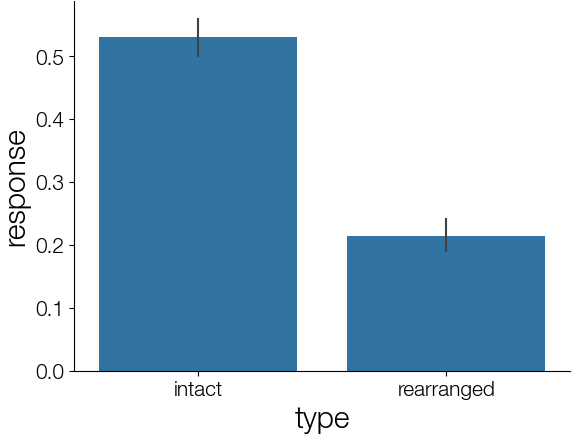

In [4]:
import seaborn as sns
sns.barplot(resp, x="type", y="response")

In [7]:
resp_lag = (
    df.filter((pl.col("phase") == "test") & (pl.col("type") == "rearranged"))
    .group_by("subj", "lag")
    .agg(pl.col("response").mean())
    .sort("subj", "lag")
)
resp_lag

subj,lag,response
i64,i64,f64
101,1,0.0625
101,2,0.1875
101,3,0.0625
101,4,0.125
101,5,0.104167
…,…,…
1150,1,0.270833
1150,2,0.1875
1150,3,0.166667


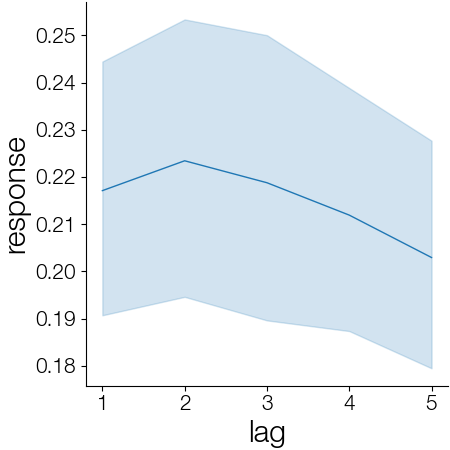

In [10]:
sns.relplot(resp_lag, x="lag", y="response", kind="line")

## Handling column formatting

## Accessing data

## Filtering data

## Modifying data